In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

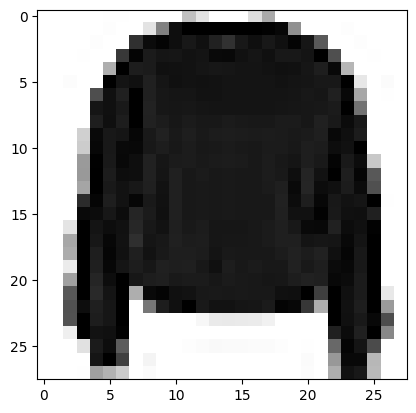

In [7]:
# show one image
plt.imshow(train_images[7], cmap=plt.cm.binary) # cmap - to show grayscale img
plt.show()

In [8]:
print(train_images[7])

# each image is 28 x 28 pixels

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

In [9]:
# we want to make these values smaller by diving them by its range (0-255)
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.


STRUCTURE OF NEURAL NETWORK

Input layer - 784 nodes (flattened 28 x 28 image)

Hidden layer - 128 nodes (randomly chosen - can tweek)

Output layer - 10 nodes (0-9 for each class)


In [10]:
# Create a model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input
    keras.layers.Dense(128, activation='relu'), # Dense - fully connected layer, relu works well for most application
    keras.layers.Dense(10, activation='softmax')   # densely connected to output layer of 10 neurons, softmax - gives probability values (all values add to 1)
])



In [11]:
# Compile the model

model.compile(
    optimizer = 'adam',   # gradient descent method, uses 2 previous layers of info to adapt the learning rate of each weight in neural network
    loss = 'sparse_categorical_crossentropy', # loss function used for categorical output (output is integers representing classes)
    metrics = ['accuracy']
)

In [12]:
# Train the model

model.fit(
    train_images,
    train_labels,
    epochs=5    # times the model sees the image label pair (running through the trainset 5 times)
)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4989 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3734 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3376 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3123 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2971 - accuracy: 0.8896


In [15]:
# Test the model

def test(model):
  test_loss, test_acc = model.evaluate(test_images, test_labels)

  print(f"Test accuracy = {test_acc}")
  print(f"Test loss = {test_loss}")

Test accuracy is kindof low so we'll try to increase the epochs and see what happens

In [16]:
model.fit(
    train_images,
    train_labels,
    epochs=10    # times the model sees the image label pair (running through the trainset 5 times)
)

test(model)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1990 - accuracy: 0.9249
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1944 - accuracy: 0.9272
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1875 - accuracy: 0.9299
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1849 - accuracy: 0.9302
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1803 - accuracy: 0.9324
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1743 - accuracy: 0.9342
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1710 - accuracy: 0.9356
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1673 - accuracy: 0.9377
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1632 - accuracy: 0.9383
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3793 

We got a better train accuracy but the test accuracy did not increase by much

In [18]:
# Predict labels for test set using the model

prediction = model.predict(test_images)

# print the index of maximum value for 1st test image prediction
class_ind = np.argmax(prediction[0])

# print the class name using index
print(class_names[class_ind])

313/313 [==============================] - 2s 5ms/step
Ankle boot


Lets try to show few images along with the actual label and our predicted label to see how well our model predicts

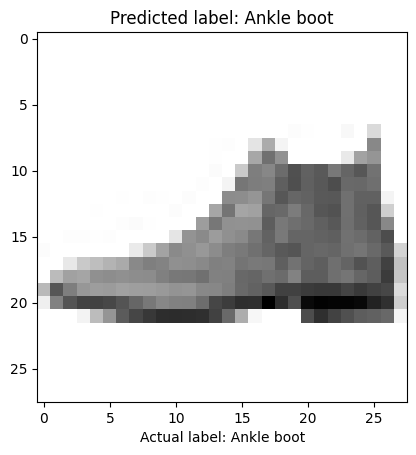

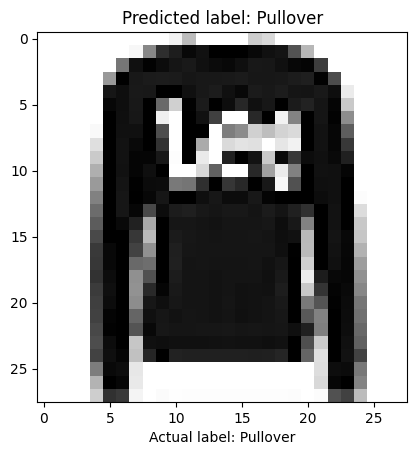

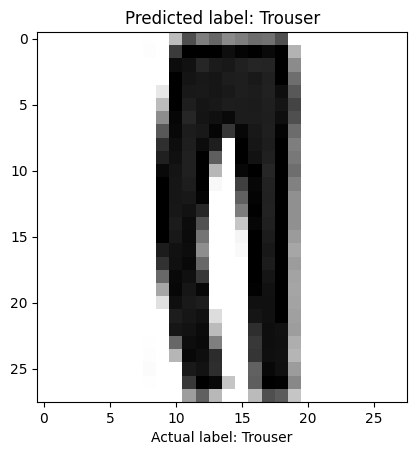

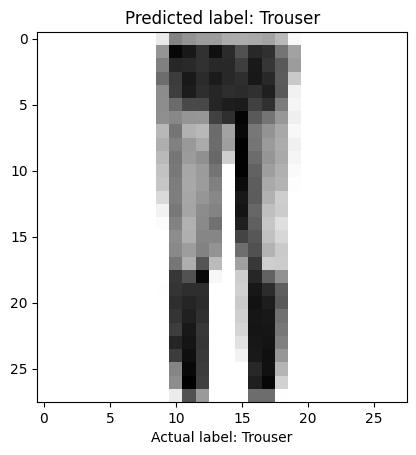

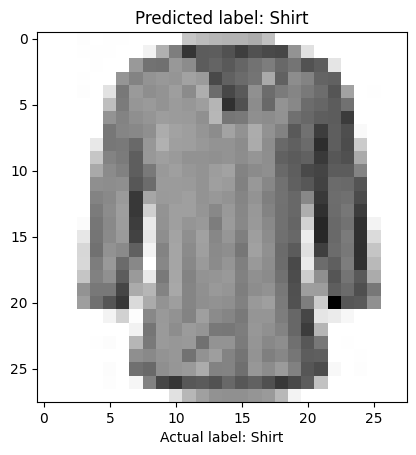

In [20]:
for i in range(5):
  plt.grid(False) # dont show the grid
  plt.imshow(test_images[i], cmap=plt.cm.binary) # cmap - to show grayscale img
  plt.xlabel(f"Actual label: {class_names[test_labels[i]]}")  # actual label
  ind = np.argmax(prediction[i])                 # get index of predicted output
  plt.title(f"Predicted label: {class_names[ind]}") # predicted label
  plt.show()